<a href="https://colab.research.google.com/github/Caritosv/Cuaderno-tarea/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pregunta 1 - Extracción de datos de acciones de Tesla utilizando y finance**

In [1]:
import yfinance as yf
import pandas as pd

# Define el ticker de Tesla
tesla = yf.Ticker("TSLA")

# Obtiene los datos históricos de las acciones
tesla_info = tesla.info
tesla_historical_data = tesla.history(period="max")

# Muestra las primeras filas de los datos históricos
print("Primeras filas de los datos históricos de acciones de Tesla:")
print(tesla_historical_data.head())

# Muestra información general de Tesla
print("\nInformación general de Tesla:")
print(tesla_info)

Primeras filas de los datos históricos de acciones de Tesla:
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  

Inform

# **Pregunta 2 - Extracción de datos de ingresos de Tesla utilizando Webscraping**

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página de ingresos de Tesla
url = "https://companiesmarketcap.com/tesla/revenue/"

try:
    # Realiza la petición HTTP
    response = requests.get(url)
    response.raise_for_status()

    # Analiza el contenido HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Intenta encontrar la tabla directamente por su contenido (busca la etiqueta table dentro de un div con cierta estructura)
    # Esta búsqueda es más específica que buscar solo por clase
    revenue_table = soup.find('div', class_='profile-container pt-3').find('table', class_='table')

    if revenue_table:
        # Lee la tabla en un DataFrame de pandas
        tesla_revenue = pd.read_html(str(revenue_table))[0]

        # Renombra las columnas (la estructura ahora parece ser 'Year', 'Revenue', 'Change')
        tesla_revenue.columns = ['Year', 'Revenue', 'Change']

        # Limpia la columna de ingresos (remueve comas y el símbolo $)
        tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r'[$,B]', '', regex=True)
        tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

        # Imprime las primeras filas de los datos de ingresos
        print("Primeras filas de los datos de ingresos de Tesla (extraídas de la tabla):")
        print(tesla_revenue.head())

        # Guarda los datos de ingresos en un archivo CSV (opcional)
        tesla_revenue.to_csv("tesla_revenue_data_webscraped.csv", index=False)
    else:
        print("No se encontró la tabla de ingresos con la estructura esperada en la página.")

except requests.exceptions.RequestException as e:
    print(f"Error al acceder a la URL: {e}")
except ValueError as e:
    print(f"Error al procesar la tabla HTML: {e}")
except AttributeError as e:
    print(f"Error al encontrar elementos HTML específicos: {e}")

Primeras filas de los datos de ingresos de Tesla (extraídas de la tabla):
   Year  Revenue  Change
0  2024    97.69   0.95%
1  2023    96.77   18.8%
2  2022    81.46  51.35%
3  2021    53.82  70.67%
4  2020    31.53  28.31%


<ipython-input-2-3377d5ae6948>:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(revenue_table))[0]


# **Pregunta 3 - Extracción de datos de acciones de GameStop utilizando y finance**

In [3]:
import yfinance as yf
import pandas as pd

# Define el ticker de GameStop
gme = yf.Ticker("GME")

# Obtiene los datos históricos de las acciones
gme_info = gme.info
gme_historical_data = gme.history(period="max")

# Muestra las primeras filas de los datos históricos
print("Primeras filas de los datos históricos de acciones de GameStop:")
print(gme_historical_data.head())

# Muestra información general de GameStop
print("\nInformación general de GameStop:")
print(gme_info)

# Guarda los datos históricos en un archivo CSV (opcional)
gme_historical_data.to_csv("gamestop_stock_data.csv")

Primeras filas de los datos históricos de acciones de GameStop:
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  

Informació

# **Pregunta 4 - Extracción de datos de ingresos de GameStop utilizando Webscraping**

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página de estado de resultados de GameStop en Yahoo Finance
url = "https://es.finance.yahoo.com/quote/GME/financials/"

try:
    # Realiza la petición HTTP
    response = requests.get(url)
    response.raise_for_status()

    # Analiza el contenido HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encuentra la sección que contiene los datos financieros anuales
    annual_data_section = soup.find('div', {'data-test': 'income-statement'})

    if annual_data_section:
        # Encuentra la tabla dentro de esta sección
        table = annual_data_section.find('table')

        if table:
            # Extrae los encabezados de las columnas (fechas)
            header_row = table.find('thead').find('tr')
            headers = [th.text for th in header_row.find_all('th') if th.text]
            # Insertar 'Concepto' como el primer encabezado
            headers.insert(0, 'Concepto')

            # Extrae las filas de datos
            data_rows = table.find('tbody').find_all('tr')
            revenue_data = {}

            for row in data_rows:
                cells = row.find_all('td')
                if cells:
                    concept = cells[0].text.strip()
                    values = [span.text.strip() for cell in cells[1:] for span in cell.find_all('span')]

                    if concept == 'Ingresos totales':
                        revenue_data['Concepto'] = concept
                        for i, value in enumerate(values):
                            revenue_data[headers[i + 1]] = value
                        break  # Asumimos que 'Ingresos totales' es único y lo encontramos

            if revenue_data:
                # Crea un DataFrame de pandas con los datos de ingresos
                df_revenue = pd.DataFrame([revenue_data])

                # Imprime el DataFrame
                print("Datos de ingresos anuales de GameStop:")
                print(df_revenue)

                # Guarda los datos en un archivo CSV (opcional)
                df_revenue.to_csv("gamestop_annual_revenue_webscraped.csv", index=False)
            else:
                print("No se encontraron los datos de ingresos totales en la tabla.")
        else:
            print("No se encontró la tabla de datos financieros anuales.")
    else:
        print("No se encontró la sección de estado de resultados anual.")

except requests.exceptions.RequestException as e:
    print(f"Error al acceder a la URL: {e}")
except AttributeError as e:
    print(f"Error al encontrar elementos HTML específicos: {e}")
except Exception as e:
    print(f"Ocurrió un error: {e}")

Error al acceder a la URL: 429 Client Error: Too Many Requests for url: https://es.finance.yahoo.com/quote/GME/financials/


# **Pregunta 5 - Tablero de acciones e ingresos de Tesla**

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True



<ipython-input-5-43caef841799>:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue_df = pd.read_html(str(revenue_table))[0]


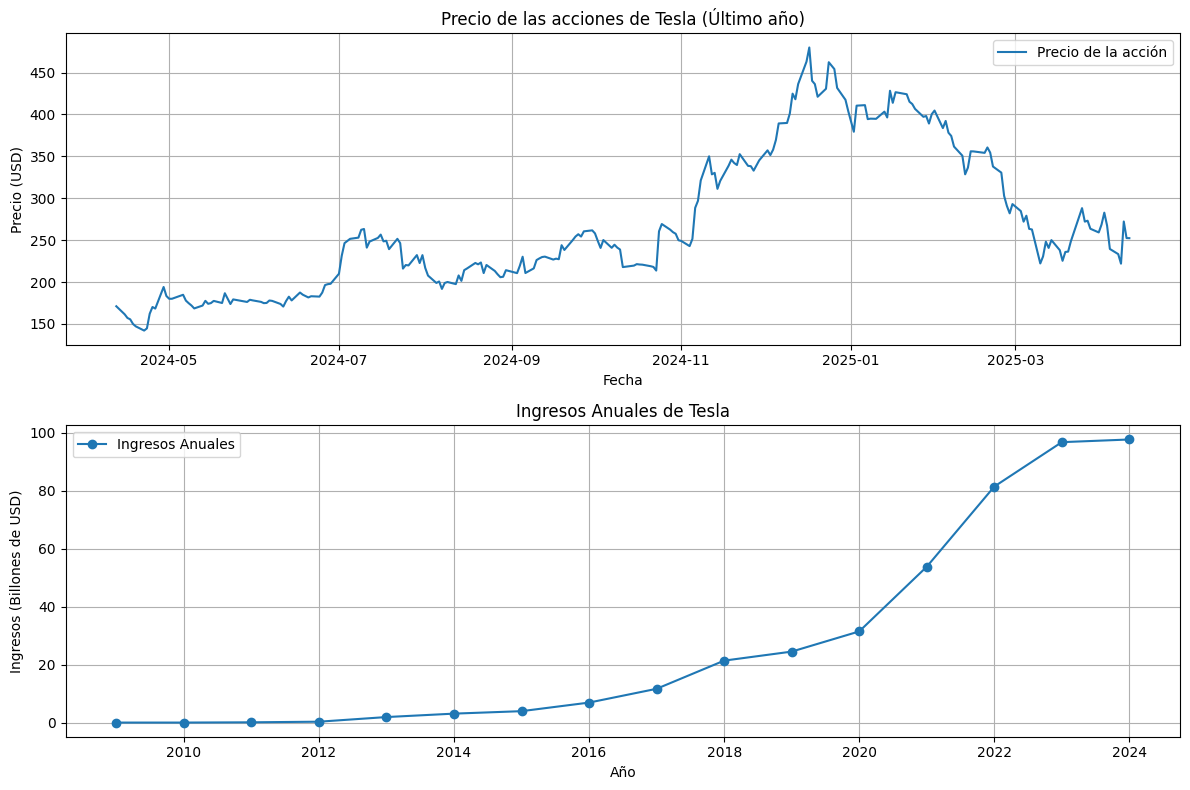

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re

# Obtener datos de acciones de Tesla
ticker = "TSLA"
data = yf.download(ticker, period="1y")

# Obtener datos de ingresos de Tesla desde companiesmarketcap.com
url = "https://companiesmarketcap.com/tesla/revenue/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Encontrar la tabla de ingresos utilizando los selectores correctos
revenue_table = soup.find('div', class_='profile-container pt-3').find('table', class_='table')

if revenue_table:
    # Leer la tabla en un DataFrame de pandas
    tesla_revenue_df = pd.read_html(str(revenue_table))[0]

    # Renombrar las columnas (asumiendo la estructura 'Year', 'Revenue', 'Change')
    tesla_revenue_df.columns = ['Year', 'Revenue', 'Change']

    # Limpiar la columna de ingresos (remueve comas y el símbolo $)
    tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].str.replace(r'[$,B]', '', regex=True)
    tesla_revenue_df["Revenue"] = pd.to_numeric(tesla_revenue_df["Revenue"])

    # Invertir el orden de los ingresos para que coincida con la cronología de las acciones (opcional)
    tesla_revenue = tesla_revenue_df[::-1]

    # Crear el tablero
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Gráfico de precios de las acciones
    ax1.plot(data['Close'], label='Precio de la acción')
    ax1.set_title('Precio de las acciones de Tesla (Último año)')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio (USD)')
    ax1.legend()
    ax1.grid(True)

    # Gráfico de ingresos
    ax2.plot(tesla_revenue['Year'], tesla_revenue['Revenue'], marker='o', linestyle='-', label='Ingresos Anuales')
    ax2.set_title('Ingresos Anuales de Tesla')
    ax2.set_xlabel('Año')
    ax2.set_ylabel('Ingresos (Billones de USD)')
    ax2.legend()
    ax2.grid(True)

    # Mostrar el tablero
    plt.tight_layout()
    plt.show()

else:
    print("No se encontró la tabla de ingresos en la página.")

# **Pregunta 6 - Cuadro de mando de acciones e ingresos de GameStop**

[*********************100%***********************]  1 of 1 completed


No se encontró la sección de estado de resultados anual.


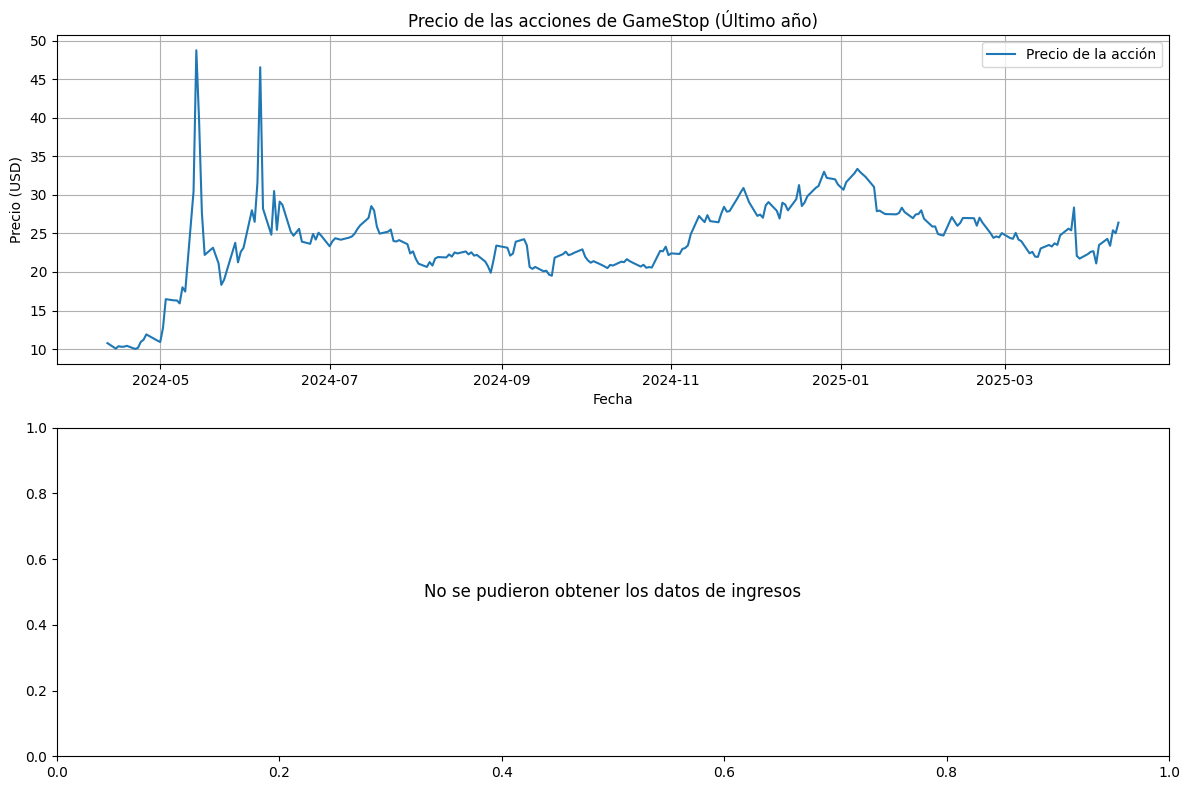

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time

# Obtener datos de acciones de GameStop
ticker = "GME"
data = yf.download(ticker, period="1y")

# Obtener datos de ingresos anuales de GameStop utilizando web scraping
url = "https://es.finance.yahoo.com/quote/GME/financials/"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Accept-Language': 'es-ES,es;q=0.9,en;q=0.8',
}

try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')

    annual_data_section = soup.find('div', {'data-test': 'income-statement'})
    if annual_data_section:
        table = annual_data_section.find('table')
        if table:
            header_row = table.find('thead').find('tr')
            headers = [th.text for th in header_row.find_all('th') if th.text]
            if 'Fin de ejercicio' in headers:
                year_index = headers.index('Fin de ejercicio')
                data_rows = table.find('tbody').find_all('tr')
                revenue_data = {}
                for row in data_rows:
                    cells = row.find_all('td')
                    if cells and cells[0].text.strip() == 'Ingresos totales':
                        revenue_values = [cell.text.strip() for cell in cells[1:]]
                        revenue_data['Ingresos'] = revenue_values
                        break

                if revenue_data:
                    years = []
                    header_cells = header_row.find_all('th')
                    for i in range(1, len(header_cells)):
                        years.append(header_cells[i].text.strip())

                    df_revenue = pd.DataFrame({'Año': years, 'Ingresos': revenue_data['Ingresos']})
                    df_revenue = df_revenue.dropna()
                    df_revenue = df_revenue[::-1].reset_index(drop=True) # Invertir y resetear índice
                else:
                    df_revenue = pd.DataFrame({'Año': [], 'Ingresos': []})
                    print("No se encontraron los datos de ingresos totales en la tabla.")
            else:
                df_revenue = pd.DataFrame({'Año': [], 'Ingresos': []})
                print("No se encontró la columna 'Fin de ejercicio' en los encabezados.")
        else:
            df_revenue = pd.DataFrame({'Año': [], 'Ingresos': []})
            print("No se encontró la tabla de datos financieros anuales.")
    else:
        df_revenue = pd.DataFrame({'Año': [], 'Ingresos': []})
        print("No se encontró la sección de estado de resultados anual.")

except requests.exceptions.RequestException as e:
    df_revenue = pd.DataFrame({'Año': [], 'Ingresos': []})
    print(f"Error al acceder a la URL: {e}")
except AttributeError as e:
    df_revenue = pd.DataFrame({'Año': [], 'Ingresos': []})
    print(f"Error al encontrar elementos HTML específicos: {e}")
except Exception as e:
    df_revenue = pd.DataFrame({'Año': [], 'Ingresos': []})
    print(f"Ocurrió un error: {e}")
finally:
    time.sleep(5)

# Crear el cuadro de mando
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Gráfico de precios de las acciones
ax1.plot(data['Close'], label='Precio de la acción')
ax1.set_title('Precio de las acciones de GameStop (Último año)')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio (USD)')
ax1.legend()
ax1.grid(True)

# Gráfico de ingresos
if not df_revenue.empty:
    ax2.plot(df_revenue['Año'], df_revenue['Ingresos'], marker='o', linestyle='-', label='Ingresos Anuales')
    ax2.set_title('Ingresos Anuales de GameStop')
    ax2.set_xlabel('Año')
    ax2.set_ylabel('Ingresos')
    ax2.legend()
    ax2.grid(True)
else:
    ax2.text(0.5, 0.5, 'No se pudieron obtener los datos de ingresos', horizontalalignment='center', verticalalignment='center', fontsize=12)

# Mostrar el cuadro de mando
plt.tight_layout()
plt.show()